## Mounting google drive for the datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# Display the first few rows of the DataFrame

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/30107730_Project/RECIPE DATASET/RAW_recipes.csv')

# Display the first few rows of the DataFrame
print(df.head(20))


                                          name      id  minutes  \
0   arriba   baked winter squash mexican style  137739       55   
1             a bit different  breakfast pizza   31490       30   
2                    all in the kitchen  chili  112140      130   
3                           alouette  potatoes   59389       45   
4           amish  tomato ketchup  for canning   44061      190   
5                      apple a day  milk shake    5289        0   
6                        aww  marinated olives   25274       15   
7               backyard style  barbecued ribs   67888      120   
8                     bananas 4 ice cream  pie   70971      180   
9                      beat this  banana bread   75452       70   
10                 berry  good sandwich spread  109439        5   
11               better than sex  strawberries   42198     1460   
12             better then bush s  baked beans   67547     2970   
13                  boat house  collard greens  107517      52

Dataset links

In [ ]:
raw_recipes = pd.read_csv("/content/drive/MyDrive/30107730_Project/RECIPE DATASET/RAW_recipes.csv")
raw_interactions = pd.read_csv("/content/drive/MyDrive/30107730_Project/RECIPE DATASET/RAW_interactions.csv")
pp_recipes = pd.read_csv("/content/drive/MyDrive/30107730_Project/RECIPE DATASET//PP_recipes.csv")
pp_users = pd.read_csv("/content/drive/MyDrive/30107730_Project/RECIPE DATASET/PP_users.csv")
ingr_map = pd.read_pickle("/content/drive/MyDrive/30107730_Project/RECIPE DATASET/ingr_map.pkl")

Merging the original raw datasets with the preprocessed data, extracting only relevaent columns , "id" column is the foreign key

In [ ]:
recipes = pp_recipes.merge(right=raw_recipes, left_on="id", right_on="id")
recipes = recipes[["id", "name", "submitted", "ingredient_ids", "ingredients", "n_ingredients","steps","n_steps"]]
recipes = recipes.rename({"id":"recipe_id"}, axis="columns")
recipes.head()

,recipe_id,name,submitted,ingredient_ids,ingredients,n_ingredients,steps,n_steps
0,424415,aromatic basmati rice rice cooker,2010-05-10,"[389, 7655, 6270, 1527, 3406]","['basmati rice', 'water', 'salt', 'cinnamon st...",5,"['rinse the rice in a fine strainer , then dra...",6
1,146223,pumpkin pie a la easy,2005-11-25,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...","['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,"['preheat oven to 350', 'combine flour , oats ...",10
2,312329,cheesy tomato soup with potatoes,2008-07-07,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...","['chicken broth', 'water', 'salt', 'black pepp...",15,"['pour the broth & water into a large pot', 'a...",6
3,74301,mini tacos,2003-10-29,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]","['wonton wrappers', 'hamburger', 'taco seasoni...",8,"['cook hamburger until browned', 'drain the fa...",8
4,76272,rosemary s hanky panky s,2003-11-12,"[3484, 6324, 7594, 243]","['ground beef', 'ground sausage', 'velveeta ch...",4,"['fry ground beef and sausage until browned', ...",5


Merging important features from the User interactions df and the recipe df

Creating a DataFrame ingr_df with columns "ingr_id" and "ingr_name", containing unique ingredient IDs and their corresponding names.

In [ ]:
ingr_df = ingr_map.copy(deep=True)
ingr_df = ingr_df.rename(columns={"id": "ingr_id", "replaced": "ingr_name"})
ingr_df = ingr_df[["ingr_id", "ingr_name"]].drop_duplicates(ignore_index=True)
ingr_df.head(10)


,ingr_id,ingr_name
0,4308,lettuce
1,2744,french vanilla pudding and pie filling mix
2,6843,stove top stuffing mix
3,1910,cream cheese
4,1168,cheddar
5,5811,radicchio
6,5205,pasta sauce
7,7233,tomato sauce
8,6482,shredded three cheese
9,4836,mozzarella


Sorting by top 10 number of recipes

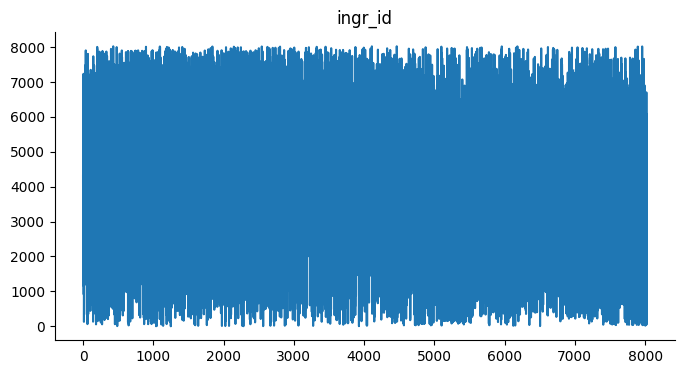

In [ ]:
# @title ingr_id

from matplotlib import pyplot as plt
ingr_df['ingr_id'].plot(kind='line', figsize=(8, 4), title='ingr_id')
plt.gca().spines[['top', 'right']].set_visible(False)

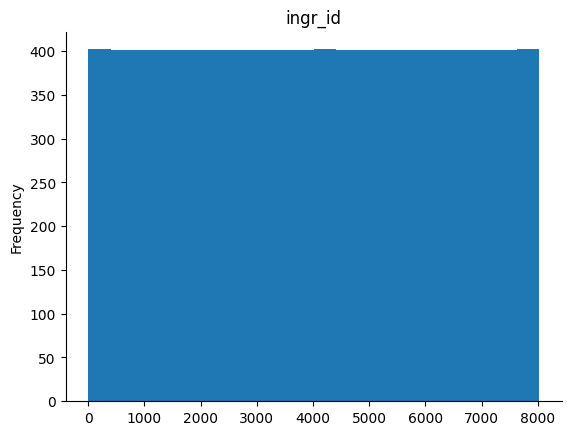

In [ ]:
# @title ingr_id

from matplotlib import pyplot as plt
ingr_df['ingr_id'].plot(kind='hist', bins=20, title='ingr_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

This creates a DataFrame recipes_exploded where each row corresponds to a single ingredient ID associated with a recipe

In [ ]:
import pandas as pd
import ast

recipes_exploded = recipes.copy(deep=True)
recipes_exploded["ingredient_ids"] = recipes_exploded["ingredient_ids"].apply(ast.literal_eval)
recipes_exploded = recipes_exploded.explode(column="ingredient_ids", ignore_index=True)
recipes_exploded.head(10)


,recipe_id,name,submitted,ingredient_ids,ingredients,n_ingredients,steps,n_steps
0,424415,aromatic basmati rice rice cooker,2010-05-10,389,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,"['rinse the rice in a fine strainer , then dra...",6
1,424415,aromatic basmati rice rice cooker,2010-05-10,7655,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,"['rinse the rice in a fine strainer , then dra...",6
2,424415,aromatic basmati rice rice cooker,2010-05-10,6270,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,"['rinse the rice in a fine strainer , then dra...",6
3,424415,aromatic basmati rice rice cooker,2010-05-10,1527,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,"['rinse the rice in a fine strainer , then dra...",6
4,424415,aromatic basmati rice rice cooker,2010-05-10,3406,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,"['rinse the rice in a fine strainer , then dra...",6
5,146223,pumpkin pie a la easy,2005-11-25,2683,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,"['preheat oven to 350', 'combine flour , oats ...",10
6,146223,pumpkin pie a la easy,2005-11-25,4969,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,"['preheat oven to 350', 'combine flour , oats ...",10
7,146223,pumpkin pie a la easy,2005-11-25,800,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,"['preheat oven to 350', 'combine flour , oats ...",10
8,146223,pumpkin pie a la easy,2005-11-25,5298,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,"['preheat oven to 350', 'combine flour , oats ...",10
9,146223,pumpkin pie a la easy,2005-11-25,840,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,"['preheat oven to 350', 'combine flour , oats ...",10


In [ ]:
# Calculate the number of recipes for each ingredient
ingr_df['num_recipes'] = ingr_df['ingr_id'].map(recipes_exploded.groupby('ingredient_ids').size())

# Sort the DataFrame by the number of recipes
sorted_ingr_df = ingr_df.sort_values(by='num_recipes', ascending=False)

# Take only the first 10 ingredients
top_10_ingr_df = sorted_ingr_df.head(100)

# Display the sorted DataFrame
print(top_10_ingr_df)


      ingr_id            ingr_name  num_recipes
120      6270                 salt      66483.0
3705      840               butter      43970.0
7046     5010                onion      39143.0
7413     2499                  egg      39064.0
7453     6906                sugar      33884.0
...       ...                  ...          ...
3776     4231                lemon       2927.0
3213     3486  ground black pepper       2903.0
5816     2757          fresh basil       2895.0
5844     4384           lime juice       2817.0
5781     3512        ground ginger       2810.0

[100 rows x 3 columns]


This groups the ingridients by the number of recipes they are used in

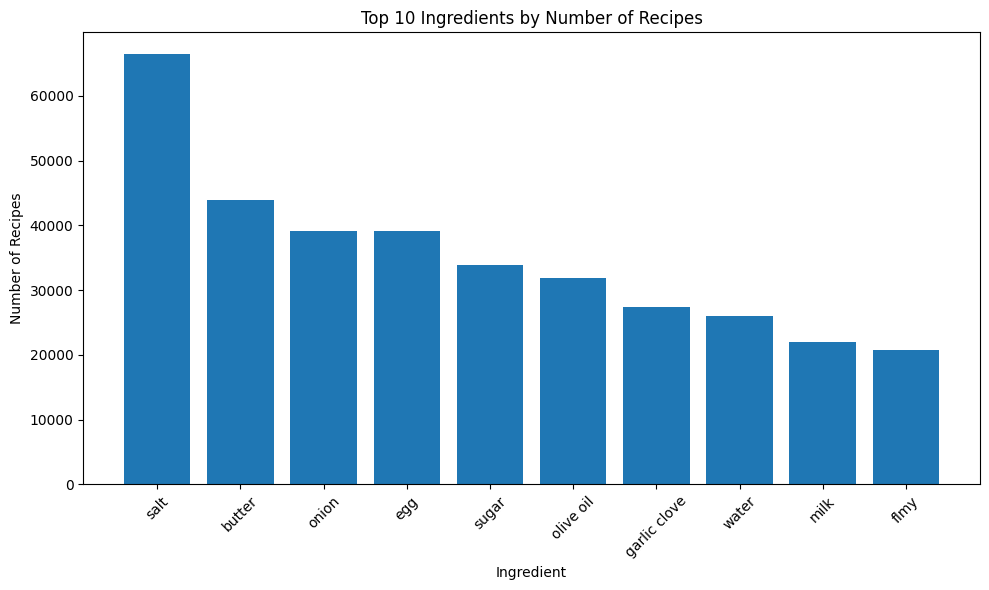

In [ ]:
import matplotlib.pyplot as plt

# Sort ingredients by the number of recipes they appear in
sorted_ingr_df = ingr_df.sort_values(by="num_recipes", ascending=False)

# Take only the first 10 ingredients
top_10_ingr_df = sorted_ingr_df.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_10_ingr_df["ingr_name"], top_10_ingr_df["num_recipes"])
plt.xlabel('Ingredient')
plt.ylabel('Number of Recipes')
plt.title('Top 10 Ingredients by Number of Recipes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
total_number_of_recipes = recipes["recipe_id"].unique().size
ingr_df["frequency"] = ingr_df["num_recipes"]/total_number_of_recipes
ingr_df.head(10)

,ingr_id,ingr_name,num_recipes,frequency
0,4308,lettuce,4294.0,0.024088
1,2744,french vanilla pudding and pie filling mix,4.0,0.000022
2,6843,stove top stuffing mix,106.0,0.000595
3,1910,cream cheese,8966.0,0.050296
4,1168,cheddar,12300.0,0.068998
5,5811,radicchio,83.0,0.000466
6,5205,pasta sauce,412.0,0.002311
7,7233,tomato sauce,3637.0,0.020402
8,6482,shredded three cheese,NaN,NaN
9,4836,mozzarella,4878.0,0.027364


Drop missing data in the ingredients DF

In [ ]:
#Drop missing data
ingr_df = ingr_df.dropna()
ingr_df.head(10)


,ingr_id,ingr_name,num_recipes,frequency
0,4308,lettuce,4294.0,0.024088
1,2744,french vanilla pudding and pie filling mix,4.0,0.000022
2,6843,stove top stuffing mix,106.0,0.000595
3,1910,cream cheese,8966.0,0.050296
4,1168,cheddar,12300.0,0.068998
5,5811,radicchio,83.0,0.000466
6,5205,pasta sauce,412.0,0.002311
7,7233,tomato sauce,3637.0,0.020402
9,4836,mozzarella,4878.0,0.027364
10,912,cake mix,2344.0,0.013149


 Check for missing values in the number of steps

In [ ]:
# Check for missing values in the number of steps
missing_values = recipes['n_steps'].isnull().sum()

# Print the number of missing values
print(f"Number of missing values in 'n_steps': {missing_values}")


Number of missing values in 'n_steps': 0


Exploding the ingridients in the Interactions DF

In [ ]:
interactions = raw_interactions[["user_id", "recipe_id", "rating", "review"]]
interactions = interactions.merge(recipes[['recipe_id', 'name','steps','n_steps','ingredient_ids']], on='recipe_id', how='left')
interactions.head()

,user_id,recipe_id,rating,review,name,steps,n_steps,ingredient_ids
0,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,"[3384, 7979, 2127, 3502, 3217, 1257, 2778, 500..."
1,1293707,40893,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,"[3384, 7979, 2127, 3502, 3217, 1257, 2778, 500..."
2,8937,44394,4,This worked very well and is EASY. I used not...,devilicious cookie cake delights,"['blend together cake mix , oil and eggs', 'ad...",5.0,"[912, 7557, 2499, 5382]"
3,126440,85009,5,I made the Mexican topping and took it to bunk...,baked potato toppings,['pick whichever topping you want to use and c...,3.0,"[4623, 6265, 1168, 6016, 3597, 3440, 7213, 169..."
4,57222,85009,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,['pick whichever topping you want to use and c...,3.0,"[4623, 6265, 1168, 6016, 3597, 3440, 7213, 169..."


Exploding the ingredient column

In [ ]:
interactions_exploded = interactions.copy(deep=True)
interactions_exploded = interactions_exploded.dropna()
interactions_exploded["ingredient_ids"] = interactions_exploded['ingredient_ids'].apply(lambda x : ast.literal_eval(x))
interactions_exploded = interactions_exploded.explode(column="ingredient_ids", ignore_index=True)
interactions_exploded.head(10)

,user_id,recipe_id,rating,review,name,steps,n_steps,ingredient_ids
0,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,3384
1,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,7979
2,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,2127
3,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,3502
4,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,3217
5,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,1257
6,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,2778
7,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,5006
8,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,6654
9,1293707,40893,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,3384


Calculating the mean rating and the number of ratings for each ingredient in the ingr_df

In [ ]:
ingr_df["mean_rating"] = ingr_df["ingr_id"].map(dict(interactions_exploded.groupby("ingredient_ids")["rating"].mean()))
ingr_df["num_ratings"] = ingr_df["ingr_id"].map(dict(interactions_exploded.groupby("ingredient_ids")["rating"].size()))
ingr_df.head(10)

,ingr_id,ingr_name,num_recipes,frequency,mean_rating,num_ratings
0,4308,lettuce,4294.0,0.024088,4.553558,17859
1,2744,french vanilla pudding and pie filling mix,4.0,0.000022,4.400000,5
2,6843,stove top stuffing mix,106.0,0.000595,4.261090,789
3,1910,cream cheese,8966.0,0.050296,4.470405,50937
4,1168,cheddar,12300.0,0.068998,4.434023,72851
5,5811,radicchio,83.0,0.000466,4.567010,194
6,5205,pasta sauce,412.0,0.002311,4.461032,1976
7,7233,tomato sauce,3637.0,0.020402,4.416130,23918
9,4836,mozzarella,4878.0,0.027364,4.489368,25960
10,912,cake mix,2344.0,0.013149,4.458136,13317


In [ ]:
new_interactions = interactions_exploded.copy(deep=True)
new_interactions = new_interactions.merge(ingr_df[["ingr_id","ingr_name","mean_rating","num_ratings"]], left_on='ingredient_ids', right_on='ingr_id', how='left')
new_interactions.head(10)


,user_id,recipe_id,rating,review,name,steps,n_steps,ingredient_ids,ingr_id,ingr_name,mean_rating,num_ratings
0,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,3384,3384,great northern bean,4.370794,1575
1,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,7979,7979,yellow onion,4.425502,10611
2,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,2127,2127,diced green chily,4.432203,2360
3,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,3502,3502,ground cumin,4.471992,23725
4,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,3217,3217,garlic powder,4.434380,66016
5,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,1257,1257,chicken broth,4.431524,52208
6,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,2778,2778,fresh cilantro leaf,4.540996,1366
7,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,5006,5006,olive oil,4.493375,152521
8,38094,40893,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,6654,6654,sour cream,4.473421,55853
9,1293707,40893,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,"['combine beans , onion , chilies , 1 / 2 teas...",4.0,3384,3384,great northern bean,4.370794,1575


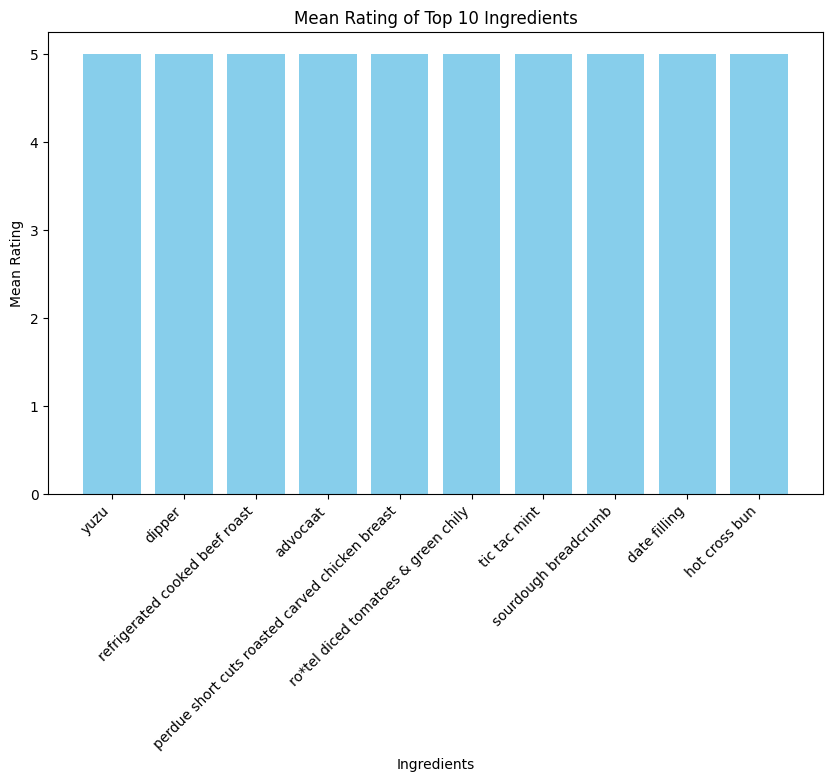

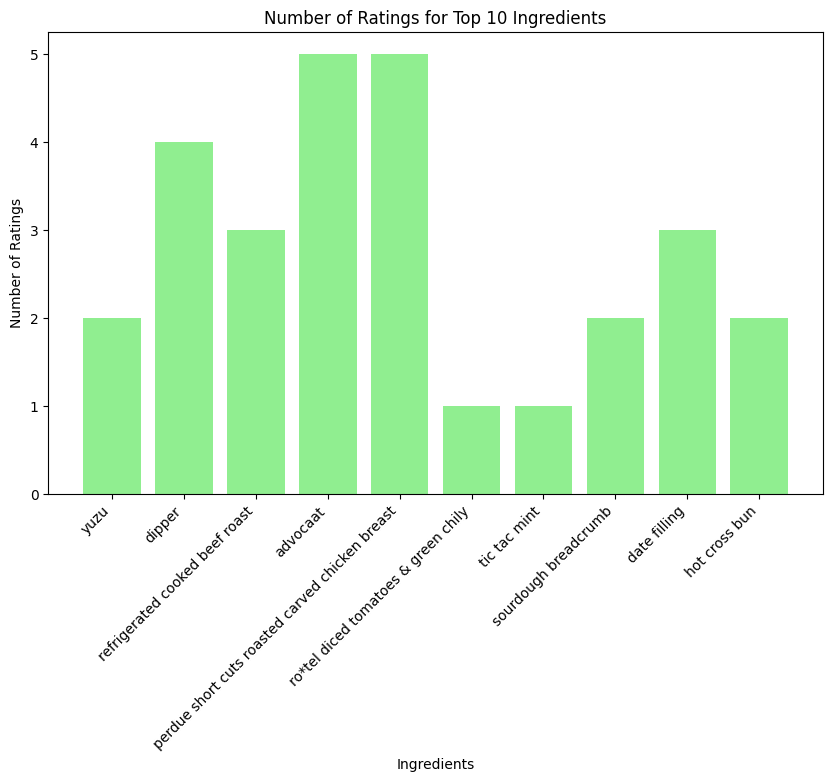

In [ ]:
import matplotlib.pyplot as plt

# Sort the ingredients by mean rating
top_ingredients_sorted = ingr_df.sort_values(by='mean_rating', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_ingredients_sorted['ingr_name'], top_ingredients_sorted['mean_rating'], color='skyblue')
plt.xlabel('Ingredients')
plt.ylabel('Mean Rating')
plt.title('Mean Rating of Top 10 Ingredients')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_ingredients_sorted['ingr_name'], top_ingredients_sorted['num_ratings'], color='lightgreen')
plt.xlabel('Ingredients')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings for Top 10 Ingredients')
plt.xticks(rotation=45, ha='right')
plt.show()


 identifying rare ingredients based on the threshold we've defined.

In [ ]:
threshold = 5
rare_ingredients = ingr_df.loc[ingr_df["num_recipes"] <= threshold, "ingr_id"].values
recipes_exploded["rare_ingr"] = recipes_exploded["ingredient_ids"].map(lambda x: x in rare_ingredients)
recipes_exploded.head(10)

,recipe_id,name,submitted,ingredient_ids,ingredients,n_ingredients,steps,n_steps,rare_ingr
0,424415,aromatic basmati rice rice cooker,2010-05-10,389,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,"['rinse the rice in a fine strainer , then dra...",6,False
1,424415,aromatic basmati rice rice cooker,2010-05-10,7655,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,"['rinse the rice in a fine strainer , then dra...",6,False
2,424415,aromatic basmati rice rice cooker,2010-05-10,6270,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,"['rinse the rice in a fine strainer , then dra...",6,False
3,424415,aromatic basmati rice rice cooker,2010-05-10,1527,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,"['rinse the rice in a fine strainer , then dra...",6,False
4,424415,aromatic basmati rice rice cooker,2010-05-10,3406,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,"['rinse the rice in a fine strainer , then dra...",6,False
5,146223,pumpkin pie a la easy,2005-11-25,2683,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,"['preheat oven to 350', 'combine flour , oats ...",10,False
6,146223,pumpkin pie a la easy,2005-11-25,4969,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,"['preheat oven to 350', 'combine flour , oats ...",10,False
7,146223,pumpkin pie a la easy,2005-11-25,800,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,"['preheat oven to 350', 'combine flour , oats ...",10,False
8,146223,pumpkin pie a la easy,2005-11-25,5298,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,"['preheat oven to 350', 'combine flour , oats ...",10,False
9,146223,pumpkin pie a la easy,2005-11-25,840,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,"['preheat oven to 350', 'combine flour , oats ...",10,False


In [ ]:
recipes["num_rare_ingr"] = recipes["recipe_id"].map(dict(recipes_exploded.groupby("recipe_id")["rare_ingr"].sum()))
recipes.head(10)

,recipe_id,name,submitted,ingredient_ids,ingredients,n_ingredients,steps,n_steps,num_rare_ingr
0,424415,aromatic basmati rice rice cooker,2010-05-10,"[389, 7655, 6270, 1527, 3406]","['basmati rice', 'water', 'salt', 'cinnamon st...",5,"['rinse the rice in a fine strainer , then dra...",6,0
1,146223,pumpkin pie a la easy,2005-11-25,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...","['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,"['preheat oven to 350', 'combine flour , oats ...",10,0
2,312329,cheesy tomato soup with potatoes,2008-07-07,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...","['chicken broth', 'water', 'salt', 'black pepp...",15,"['pour the broth & water into a large pot', 'a...",6,0
3,74301,mini tacos,2003-10-29,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]","['wonton wrappers', 'hamburger', 'taco seasoni...",8,"['cook hamburger until browned', 'drain the fa...",8,0
4,76272,rosemary s hanky panky s,2003-11-12,"[3484, 6324, 7594, 243]","['ground beef', 'ground sausage', 'velveeta ch...",4,"['fry ground beef and sausage until browned', ...",5,0
5,465171,pink bavarian crown strawberry dream supreme,2011-09-29,"[6861, 7655, 6846, 6906, 1789, 131, 6863, 1833...","['strawberry jell-o gelatin dessert', 'water',...",10,['mix strawberry jell-o with boiling water the...,15,0
6,163861,tom and kelly s chicken fried steak,2006-04-11,"[5574, 2683, 6270, 5319, 2499, 869, 1278, 4987...","['boneless pork chops', 'flour', 'salt', 'pepp...",9,"['have your butcher ""cube"" 2 lean boneless por...",11,0
7,186383,chocolate oat cookie bars,2006-09-15,"[2683, 4969, 332, 335, 6270, 800, 4987, 7470, ...","['flour', 'oats', 'baking powder', 'baking sod...",10,"['preheat oven to 350 degrees', 'whisk togethe...",8,0
8,116395,tropical lemon cream bars,2005-04-12,"[2683, 1689, 5687, 1098, 840, 7782, 7011, 1910...","['flour', ""confectioners' sugar"", 'powdered mi...",13,"['crust:', 'combine flour , confectioners suga...",16,0
9,303460,jeera on cubes barbecue marinade,2008-05-13,"[6413, 7997, 3148, 3710, 1799, 2007, 3203, 265...","['sesame oil', 'yoghurt', 'fruit vinegar', 'ho...",9,['roast coriander and cumin and ground afterwa...,7,1


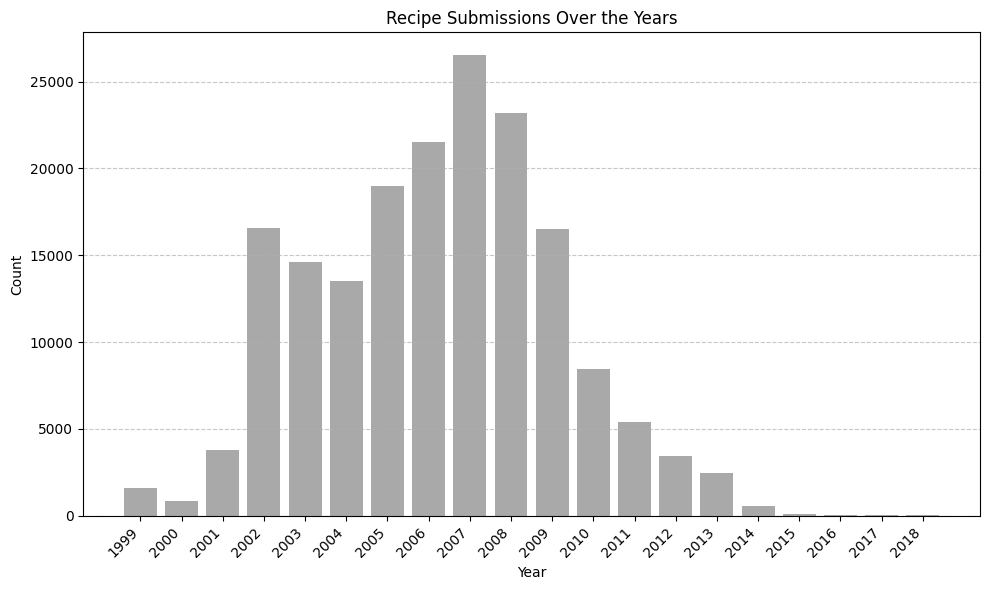

In [ ]:
import matplotlib.pyplot as plt

# Extracting the year from the "submitted" column
recipes["year"] = recipes["submitted"].str.split("-").str[0]

# Counting the number of recipe submissions for each year
year_counts = recipes["year"].value_counts().sort_index()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values, color="darkgray")
plt.title("Recipe Submissions Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
recipes_subset = recipes_exploded.copy(deep=True)
recipes_subset["year"] = recipes_subset["submitted"].map(lambda x: x.split("-")[0]).astype(int)
recipes_subset["year"] = recipes_subset["year"].astype(int)
recipes_subset = recipes_subset[(recipes_subset["year"]>=2002) & (recipes_subset["year"]<=2009)]
recipes_subset.reset_index(inplace=True)
recipes_subset.head()

,index,recipe_id,name,submitted,ingredient_ids,ingredients,n_ingredients,steps,n_steps,rare_ingr,year
0,5,146223,pumpkin pie a la easy,2005-11-25,2683,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,"['preheat oven to 350', 'combine flour , oats ...",10,False,2005
1,6,146223,pumpkin pie a la easy,2005-11-25,4969,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,"['preheat oven to 350', 'combine flour , oats ...",10,False,2005
2,7,146223,pumpkin pie a la easy,2005-11-25,800,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,"['preheat oven to 350', 'combine flour , oats ...",10,False,2005
3,8,146223,pumpkin pie a la easy,2005-11-25,5298,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,"['preheat oven to 350', 'combine flour , oats ...",10,False,2005
4,9,146223,pumpkin pie a la easy,2005-11-25,840,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,"['preheat oven to 350', 'combine flour , oats ...",10,False,2005


Analyzing patters in recipe submission between year 2002 and 2009

In [ ]:
by_year_df = pd.DataFrame(recipes_subset.groupby("year")["ingredient_ids"].value_counts())
by_year_df.columns = ["num_recipes"]
by_year_df.reset_index(inplace=True)
year_to_num_recipes = dict(recipes_subset.groupby("year").size())
by_year_df["fraction_using"] =  by_year_df[["year","num_recipes"]].apply(lambda row: row["num_recipes"]/year_to_num_recipes[row["year"]], axis=1)
by_year_df.head(10)

,year,ingredient_ids,num_recipes,fraction_using
0,2002,6270,6398,0.043480
1,2002,840,4506,0.030622
2,2002,5010,4116,0.027972
3,2002,2499,3821,0.025967
4,2002,6906,3422,0.023255
5,2002,3184,2720,0.018485
6,2002,7655,2616,0.017778
7,2002,4717,2323,0.015787
8,2002,2683,2319,0.015760
9,2002,5006,2227,0.015134


In [ ]:
by_year_df = by_year_df.merge(right=ingr_df[["ingr_name","ingr_id"]], how="left", left_on="ingredient_ids", right_on="ingr_id")
by_year_df = by_year_df[["ingr_name", "ingr_id", "year", "num_recipes", "fraction_using"]]
by_year_df.head(10)

,ingr_name,ingr_id,year,num_recipes,fraction_using
0,salt,6270,2002,6398,0.043480
1,butter,840,2002,4506,0.030622
2,onion,5010,2002,4116,0.027972
3,egg,2499,2002,3821,0.025967
4,sugar,6906,2002,3422,0.023255
5,garlic,3184,2002,2720,0.018485
6,water,7655,2002,2616,0.017778
7,milk,4717,2002,2323,0.015787
8,flmy,2683,2002,2319,0.015760
9,olive oil,5006,2002,2227,0.015134


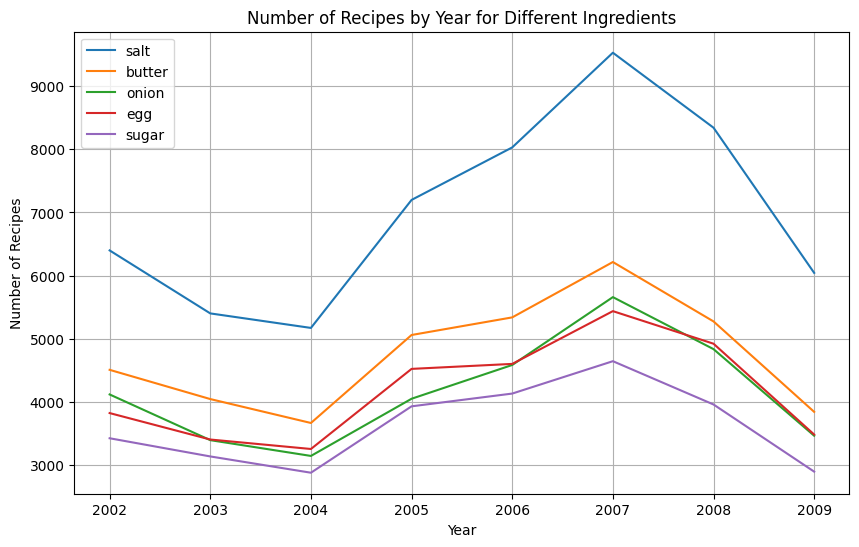

In [ ]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
for ingredient in by_year_df['ingr_name'].unique()[:5]:  # Plotting only the first 5 ingredients for clarity
    data = by_year_df[by_year_df['ingr_name'] == ingredient]
    plt.plot(data['year'], data['num_recipes'], label=ingredient)

plt.title('Number of Recipes by Year for Different Ingredients')
plt.xlabel('Year')
plt.ylabel('Number of Recipes')
plt.legend(loc='upper left')  # Adjust legend placement
plt.grid(True)
plt.show()


Aanalyzing sauces


In [ ]:
#Looking at trends

sauces_df = ingr_df.iloc[list(ingr_df["ingr_name"].apply(lambda x: ("sauce" in x.split())))].sort_values(by="frequency", ascending=False, ignore_index=True).head(10)
sauces_df

,ingr_id,ingr_name,num_recipes,frequency,mean_rating,num_ratings
0,6696,soy sauce,9124.0,0.051182,4.432470,54531
1,7946,worcestershire sauce,6282.0,0.035240,4.405627,35614
2,7233,tomato sauce,3637.0,0.020402,4.416130,23918
3,7049,tabasco sauce,1698.0,0.009525,4.427619,8103
4,3810,hot sauce,1630.0,0.009144,4.443696,8614
5,1330,chili sauce,1341.0,0.007523,4.391391,6551
6,367,barbecue sauce,1227.0,0.006883,4.466495,9327
7,3800,hot pepper sauce,1040.0,0.005834,4.513854,4836
8,2654,fish sauce,974.0,0.005464,4.479890,4376
9,6711,spaghetti sauce,865.0,0.004852,4.463934,5684


In [ ]:
cooking_sauce_names = list(sauces_df["ingr_name"].values)
cooking_sauce_names_of_interest = cooking_sauce_names[:]
print(cooking_sauce_names_of_interest)

['soy sauce', 'worcestershire sauce', 'tomato sauce', 'tabasco sauce', 'hot sauce', 'chili sauce', 'barbecue sauce', 'hot pepper sauce', 'fish sauce', 'spaghetti sauce']


In [ ]:
# Subset the dataset again to include sauces, this time including all of them but replacing them with 'other' if they aren't in our list of commonly used ones.
by_year_df_subsets = by_year_df.iloc[list(by_year_df["ingr_name"].apply(lambda x: ("sauce" in x.split())))]
by_year_df_subsets["ingr_name"] = by_year_df_subsets["ingr_name"].map(lambda x: {name:name for name in cooking_sauce_names}.get(x, "other"))
cooking_sauce_names.append("other")
by_year_df_subsets.head(10)

<ipython-input-28-dadb187a956b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_year_df_subsets["ingr_name"] = by_year_df_subsets["ingr_name"].map(lambda x: {name:name for name in cooking_sauce_names}.get(x, "other"))


,ingr_name,ingr_id,year,num_recipes,fraction_using
29,soy sauce,6696,2002,858,0.005831
36,worcestershire sauce,7946,2002,695,0.004723
60,tomato sauce,7233,2002,378,0.002569
143,tabasco sauce,7049,2002,196,0.001332
163,hot sauce,3810,2002,155,0.001053
214,chili sauce,1330,2002,113,0.000768
220,hot pepper sauce,3800,2002,108,0.000734
232,spaghetti sauce,6711,2002,100,0.000680
236,barbecue sauce,367,2002,97,0.000659
248,fish sauce,2654,2002,94,0.000639


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 8.2 MB/s eta 0:00:00


<ipython-input-29-b7961441e71d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


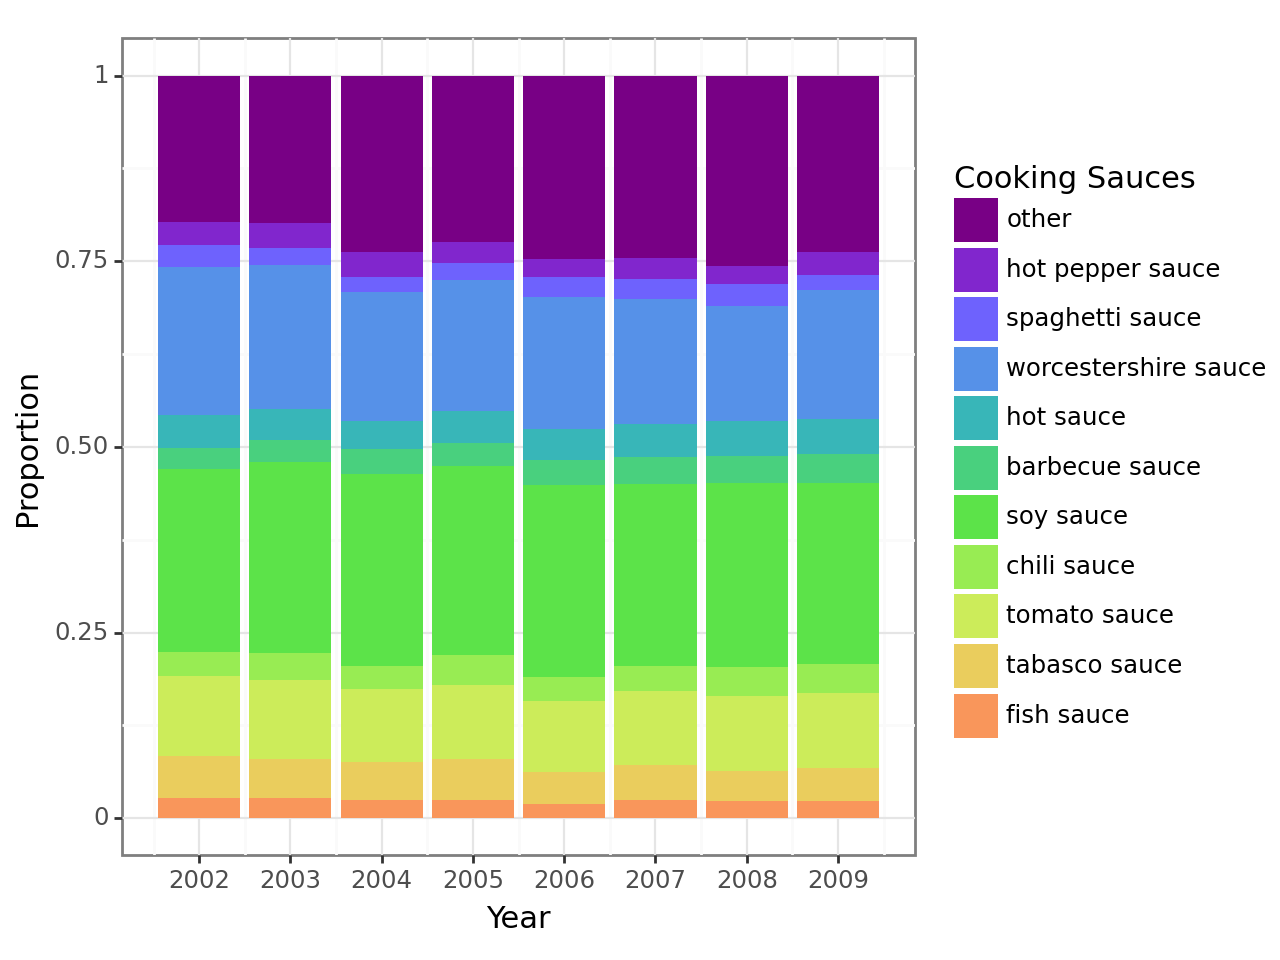

<Figure Size: (640 x 480)>

In [ ]:
!pip install palettable
!pip install plotnine
from plotnine import ggplot, aes, geom_bar, scale_x_continuous, theme_bw, ylab, xlab, scale_fill_manual

import numpy as np

# Remove duplicates from the list of cooking sauce names
cooking_sauce_names_unique = list(set(cooking_sauce_names))

# This is necessary to make sure the order of the sections in a given bar is the way we want it and consistent with the legend.
category_order = cooking_sauce_names_unique
by_year_df_subsets['ingr_name'] = pd.Categorical(by_year_df_subsets['ingr_name'], categories=category_order, ordered=True)

# Get a color palette and create a mapping between each ingredient that needs to be in the plot and a color palette.
from palettable.mycarta import Cube1_11
pal = Cube1_11.hex_colors
color_mapping = dict(zip(cooking_sauce_names_unique, pal[:len(cooking_sauce_names_unique)]))

# Make the plot.
(ggplot(data=by_year_df_subsets)
    + aes(y='fraction_using', x='year', fill="ingr_name")
    + scale_x_continuous(breaks=np.arange(2002,2010))
    + theme_bw()
    + geom_bar(position="fill", stat="identity")
    + ylab("Proportion")
    + xlab("Year")
    + scale_fill_manual(name="Cooking Sauces", values=color_mapping, limits=cooking_sauce_names_unique)
)


In [ ]:
'''
!pip install plotnine
from plotnine import ggplot, aes, geom_bar, scale_x_continuous, theme_bw, ylab, xlab, scale_fill_manual
# Set plot settings
plot_settings = (
    ggplot(plot_data)
    + geom_point(aes(x="year", y="fraction_using"), color=light_blue, show_legend=False)
    + facet_wrap("ingr_name", ncol=4, scales="fixed")
    + theme_bw()
    + theme(
        subplots_adjust={"wspace": 0.1},
        panel_grid_minor=element_blank(),
        axis_text_x=element_text(rotation=45, hjust=1),
        axis_line=element_line(color="black", size=0.5),
        axis_text=element_text(color="black", size=8),
        axis_title=element_text(color="black", size=10),
        strip_text=element_text(size=10),
        legend_position="none",
        figure_size=(8, 4),
    )
    + ylab("Fraction Using")
    + xlab("Year")
    + scale_x_continuous(breaks=range(2002, 2010, 1))  # Adjust x-axis ticks
)

# Display the plot
print(plot_settings)
'''

'\n!pip install plotnine\nfrom plotnine import ggplot, aes, geom_bar, scale_x_continuous, theme_bw, ylab, xlab, scale_fill_manual\n# Set plot settings\nplot_settings = (\n    ggplot(plot_data)\n    + geom_point(aes(x="year", y="fraction_using"), color=light_blue, show_legend=False)\n    + facet_wrap("ingr_name", ncol=4, scales="fixed")\n    + theme_bw()\n    + theme(\n        subplots_adjust={"wspace": 0.1},\n        panel_grid_minor=element_blank(),\n        axis_text_x=element_text(rotation=45, hjust=1),\n        axis_line=element_line(color="black", size=0.5),\n        axis_text=element_text(color="black", size=8),\n        axis_title=element_text(color="black", size=10),\n        strip_text=element_text(size=10),\n        legend_position="none",\n        figure_size=(8, 4),\n    )\n    + ylab("Fraction Using")\n    + xlab("Year")\n    + scale_x_continuous(breaks=range(2002, 2010, 1))  # Adjust x-axis ticks\n)\n\n# Display the plot\nprint(plot_settings)\n'

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
# Download the punkt tokenizer
nltk.download('punkt')

# Function to tokenize a string
def tokenize_string(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    return tokens

# Function to search recipes based on tokenized food name
def search_recipes(food_name):
    # Tokenize the input food name
    tokens_to_search = set(tokenize_string(food_name))

    # Tokenize recipe names and find matches
    matching_recipes = []
    for index, recipe in recipes.iterrows():
        recipe_name_tokens = set(tokenize_string(recipe['name']))
        if tokens_to_search & recipe_name_tokens:  # Intersection of sets
            matching_recipes.append(recipe)

    return pd.DataFrame(matching_recipes)

# Example usage
def main():
    # Input food name
    food_name = input("Enter a food name: ").strip()

    # Search for recipes based on the tokenized input food name
    matching_recipes = search_recipes(food_name)

    # Display the results
    if matching_recipes.empty:
        print(f"No recipes found containing '{food_name}'.")
    else:
        print(f"Found {len(matching_recipes)} recipes containing '{food_name}':")
        for index, recipe in matching_recipes.iterrows():
            print(f"Recipe ID: {recipe['recipe_id']}")
            print(f"Name: {recipe['name']}")
            print(f"Steps: {recipe['steps']}")
            print(f"Ingredients: {recipe['ingredients']}")
            print(f"Number of Ingredients: {recipe['n_ingredients']}")
            print(f"Number of Steps: {recipe['n_steps']}")
            print()

# Run the main function
if __name__ == "__main__":
    main()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Streaming output truncated to the last 5000 lines.
Number of Steps: 8

Recipe ID: 57492
Name: seafood rice casserole
Steps: ['in a 1-1 / 2 quart baking dish coated with nonstick cooking spray , combine rice , onion and chiles', 'in a bowl , combine clams and milk', 'pour over rice mixture', 'sprinkle with crumbs and cheese', 'bake , uncovered , at 350 degrees for 45 minutes']
Ingredients: ['cooked long-grain rice', 'onion', 'green chilies', 'clams', 'evaporated milk', 'seasoned bread crumbs', 'cheddar cheese']
Number of Ingredients: 7
Number of Steps: 5

Recipe ID: 488776
Name: mushroom and lavender rice pilaf  vegan
Steps: ['place the lavender , mustard seeds and fennel seeds in a spice grinder', 'pulse until finely ground', 'warm the olive oil in a large skillet over medium heat', 'stir in the rice and shallots', 'saute for 5 minutes', 'add the mushrooms , sauteeing for about 5 minutes or until golden brown and the liquid from the mushrooms has started to evaporate', 'stir in the sal

exploding the name column into individual tokens

In [ ]:
recipes_exploded_wrt_name_tokens = recipes.copy(deep=True)
recipes_exploded_wrt_name_tokens["name_tokens"] = recipes_exploded_wrt_name_tokens["name"].map(lambda x: x.split())
recipes_exploded_wrt_name_tokens = recipes_exploded_wrt_name_tokens.explode(column="name_tokens", ignore_index=True)
recipes_exploded_wrt_name_tokens = recipes_exploded_wrt_name_tokens[["recipe_id", "name_tokens", "ingredient_ids"]]
recipes_exploded_wrt_name_tokens.head(1000)

,recipe_id,name_tokens,ingredient_ids
0,424415,aromatic,"[389, 7655, 6270, 1527, 3406]"
1,424415,basmati,"[389, 7655, 6270, 1527, 3406]"
2,424415,rice,"[389, 7655, 6270, 1527, 3406]"
3,424415,rice,"[389, 7655, 6270, 1527, 3406]"
4,424415,cooker,"[389, 7655, 6270, 1527, 3406]"
...,...,...,...
995,61278,method,"[4284, 2832, 6906, 840, 2499, 2512]"
996,61278,lime,"[4284, 2832, 6906, 840, 2499, 2512]"
997,61278,or,"[4284, 2832, 6906, 840, 2499, 2512]"
998,61278,orange,"[4284, 2832, 6906, 840, 2499, 2512]"


Exploding the ingrident ID column

In [ ]:
ingredient_id_to_prob = dict(zip(ingr_df["ingr_id"].values, ingr_df["frequency"]))


Computes the counts and stores them in dictionaries for further use.

In [ ]:
name_token_and_ingredient_id_to_counts = dict(recipes_exploded_wrt_name_tokens.groupby("name_tokens")["ingredient_ids"].value_counts())
name_token_to_count = dict(recipes_exploded_wrt_name_tokens.groupby("name_tokens").size())

 calculates the probability of a given name_token and ingr_id combination occurring in the dataset. using Laplace smoothing

In [ ]:
name_token_and_ingredient_id_to_prob = lambda name_token,ingr_id: (name_token_and_ingredient_id_to_counts.get((name_token,ingr_id), 0)+1)/name_token_to_count[name_token]
name_token_and_ingredient_id_to_prob("meat", 1685)


0.0016556291390728477

In [ ]:
import math
ingr_prob = lambda ingr_id,name_tokens: math.log(ingredient_id_to_prob[ingr_id]) + np.sum([math.log(name_token_and_ingredient_id_to_prob(name_token,ingr_id)) for name_token in name_tokens])
ingr_prob(2200, ["beef", "egg", "soy", "pol"])

-27.08087739623464

In [ ]:
ingr_probs = lambda name_tokens: {ingr_id:ingr_prob(ingr_id,name_tokens) for ingr_id in ingr_df["ingr_id"].values}

Recipe suggestions based on the ingredients

In [ ]:
recipe_name_tokens = ["bread", "and","egg"]
results = pd.DataFrame(zip(*ingr_probs(recipe_name_tokens).items())).transpose()
results.columns = ["ingr_id", "score"]
results = ingr_df.merge(results, on="ingr_id")
results = results.sort_values(by="score", ascending=False, ignore_index=True)
results.head(6)



,ingr_id,ingr_name,num_recipes,frequency,mean_rating,num_ratings,score
0,6270,salt,66483.0,0.372945,4.409567,394070,-26.709997
1,840,butter,43970.0,0.246655,4.428311,262718,-27.123435
2,5010,onion,39143.0,0.219578,4.413349,206455,-27.239721
3,2499,egg,39064.0,0.219134,4.386073,228475,-27.241741
4,6906,sugar,33884.0,0.190077,4.395616,195993,-27.384000
5,5006,olive oil,31834.0,0.178577,4.493375,152521,-27.446408


This predicts the top ingredients commonly used in the recipe inputted

In [ ]:
# Define a list of ingredients to search for in recipes
target_ingredients = results.head(10)["ingr_name"].tolist()

# Define a function to count the number of target ingredients present in a recipe
def count_target_ingredients(recipe):
    return sum(ingredient in recipe['ingredients'] for ingredient in target_ingredients)

# Count the number of target ingredients present in each recipe
recipes_exploded['ingredient_count'] = recipes_exploded.apply(count_target_ingredients, axis=1)

# Sort recipes by the number of target ingredients present, in descending order
sorted_recipes = recipes_exploded.sort_values(by='ingredient_count', ascending=False)

# Drop duplicate recipes based on the 'name' column
filtered_recipes = sorted_recipes.drop_duplicates(subset=['name'])

# Get the top 10 recipes with the most target ingredients present
top_10_recipes = filtered_recipes.head(10)

print(top_10_recipes[['name', 'ingredient_count']])


                                                      name  ingredient_count
498824            skillet chili pie with cornbread topping                 8
559479                               loaded focaccia bread                 8
451789         the ultimate spaghetti and meatballs recipe                 8
456464                meatballs and gravy  spaghetti sauce                 8
1132535                       onion and goat s cheese flan                 8
474249               holubky  slovak stuffed cabbage rolls                 8
520715                chicken and dumplings   lighter fare                 7
1120523                           chicken mushroom piccata                 7
674876                   stuffed meatloaf with curry sauce                 7
520833   skillet lasagna with italian sausage and butte...                 7


In [ ]:
#USING GPT MODEL AND TOKENIZER

In [ ]:
# Merging two DataFrames (pp_recipes and raw_recipes) on the "id" column
recipes = pp_recipes.merge(right=raw_recipes, left_on="id", right_on="id")

# Selecting relevant columns
recipes = recipes[["id", "name", "submitted", "ingredients", "n_ingredients", "steps", "n_steps"]]

# Renaming the "id" column to "recipe_id"
recipes = recipes.rename({"id": "recipe_id"}, axis="columns")

# Show the first few rows to confirm the dataset looks correct
recipes.head()


,recipe_id,name,submitted,ingredients,n_ingredients,steps,n_steps
0,424415,aromatic basmati rice rice cooker,2010-05-10,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,"['rinse the rice in a fine strainer , then dra...",6
1,146223,pumpkin pie a la easy,2005-11-25,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,"['preheat oven to 350', 'combine flour , oats ...",10
2,312329,cheesy tomato soup with potatoes,2008-07-07,"['chicken broth', 'water', 'salt', 'black pepp...",15,"['pour the broth & water into a large pot', 'a...",6
3,74301,mini tacos,2003-10-29,"['wonton wrappers', 'hamburger', 'taco seasoni...",8,"['cook hamburger until browned', 'drain the fa...",8
4,76272,rosemary s hanky panky s,2003-11-12,"['ground beef', 'ground sausage', 'velveeta ch...",4,"['fry ground beef and sausage until browned', ...",5


In [ ]:
pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
import pandas as pd

# Assuming your dataset is stored in a Pandas DataFrame called 'recipes'
# Example dataset structure:
# recipes = pd.read_csv('path_to_your_csv.csv')

# Function to combine 'name', 'ingredients', and 'steps' into a formatted string
def format_recipe(row):
    # Convert the ingredients and steps from list format to a string
    ingredients = ", ".join(row['ingredients']) if isinstance(row['ingredients'], list) else row['ingredients']
    steps = " ".join(row['steps']) if isinstance(row['steps'], list) else row['steps']

    # Format the combined text
    recipe_text = f"Recipe: {row['name']}\nIngredients: {ingredients}\nSteps: {steps}"
    return recipe_text

# Apply the formatting function to each row
recipes['text'] = recipes.apply(format_recipe, axis=1)

# Preview the first few rows to verify the combined text
print(recipes[['recipe_id', 'text']].head())


   recipe_id                                               text
0     424415  Recipe: aromatic basmati rice  rice cooker\nIn...
1     146223  Recipe: pumpkin pie a la easy\nIngredients: ['...
2     312329  Recipe: cheesy tomato soup with potatoes\nIngr...
3      74301  Recipe: mini tacos\nIngredients: ['wonton wrap...
4      76272  Recipe: rosemary s hanky panky s\nIngredients:...
